In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/acer/Downloads/titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data = data.drop(columns=['Cabin','Embarked'], axis=1)

In [8]:
data = data.dropna(subset=['Age'])

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [10]:
# Count of survived and non-survived passengers
survived_counts = data['Survived'].value_counts()


In [11]:
survived_count = survived_counts[1]
non_survived_count = survived_counts[0]

print("Survived:", survived_count)
print("Non-Survived:", non_survived_count)

Survived: 290
Non-Survived: 424


# Visualization 

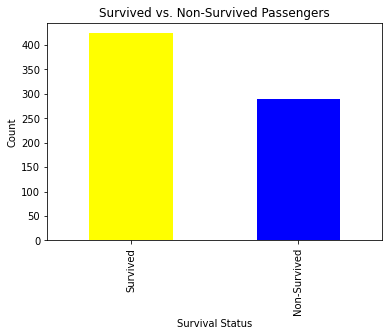

In [12]:
# Create a bar plot
plt.figure(figsize=(6, 4))
survived_counts.plot(kind='bar', color=['yellow', 'blue'])
plt.title('Survived vs. Non-Survived Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Survived', 'Non-Survived'])
plt.show()

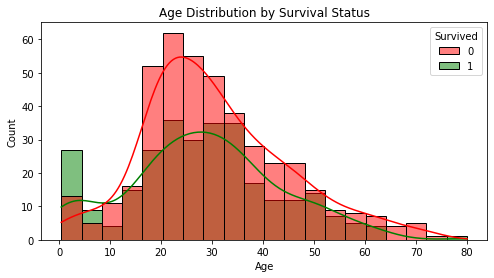

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, palette=['red', 'green'])
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

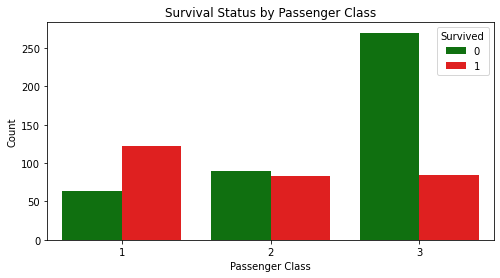

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Pclass', hue='Survived', palette=['green', 'red'])
plt.title('Survival Status by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

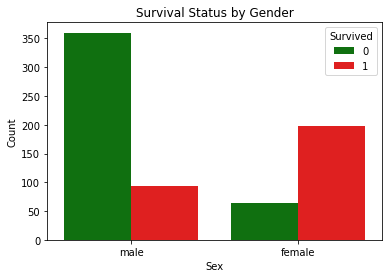

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Sex', hue='Survived', palette=['green', 'red'])
plt.title('Survival Status by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [17]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [18]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})


In [19]:
data = data.dropna()

In [20]:
X = data[['Pclass', 'Age', 'Sex']]


In [21]:
y= data['Survived']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1000)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix


In [25]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)
predict=logreg_model.predict(X_test)

In [26]:
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8111888111888111
[[69 14]
 [13 47]]
0.7704918032786885
0.7833333333333333


# XGBClassifier

In [30]:
from xgboost import XGBClassifier


In [31]:
xgb=XGBClassifier(max_depth=2, n_estimators=700, learning_rate=0.009,random_state=42)
xgb.fit(X_train,y_train)
predict=xgb.predict(X_test)

In [32]:
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))


0.8391608391608392
[[76  7]
 [16 44]]
0.8627450980392157


# Prediction

In [33]:
new_passenger = [3, 25, 1]  # Pclass, Age, Gender (1 for male)
survival_probability = logreg_model.predict([new_passenger])
if survival_probability == 1:
    print("The passenger is likely to survive.")
else:
    print("The passenger is unlikely to survive.")

The passenger is unlikely to survive.
